In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [5]:
parameter_dict = {
    "test_id": "filtered-strict-subsample-no-combat-leiden", 
    "do_regress_out": True,
    "do_combat": False,
    "n_neighbors": [50],
    "n_pcs": [10],
    # "n_neighbors": [15, 15, 15, 50, 50, 50, 100, 100, 100],
    # "n_pcs": [5, 10, 15, 5, 10, 15, 5, 10, 15],
    "cluster_resolution": [.5, 1, 1.5, 2],
}

0it [00:00, ?it/s]

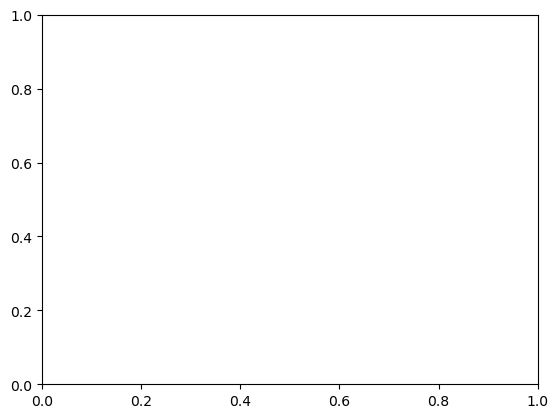

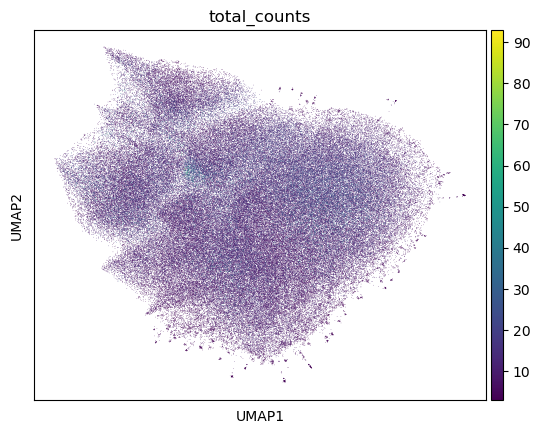

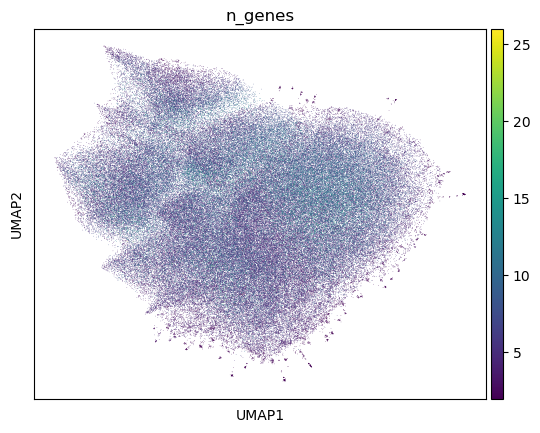

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


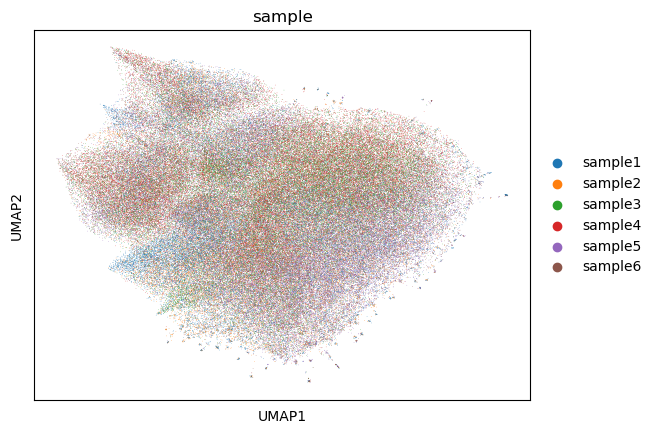

0it [00:00, ?it/s]

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


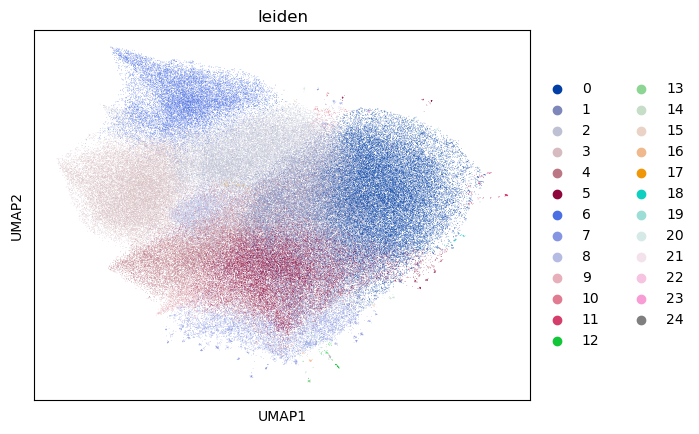

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid 

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


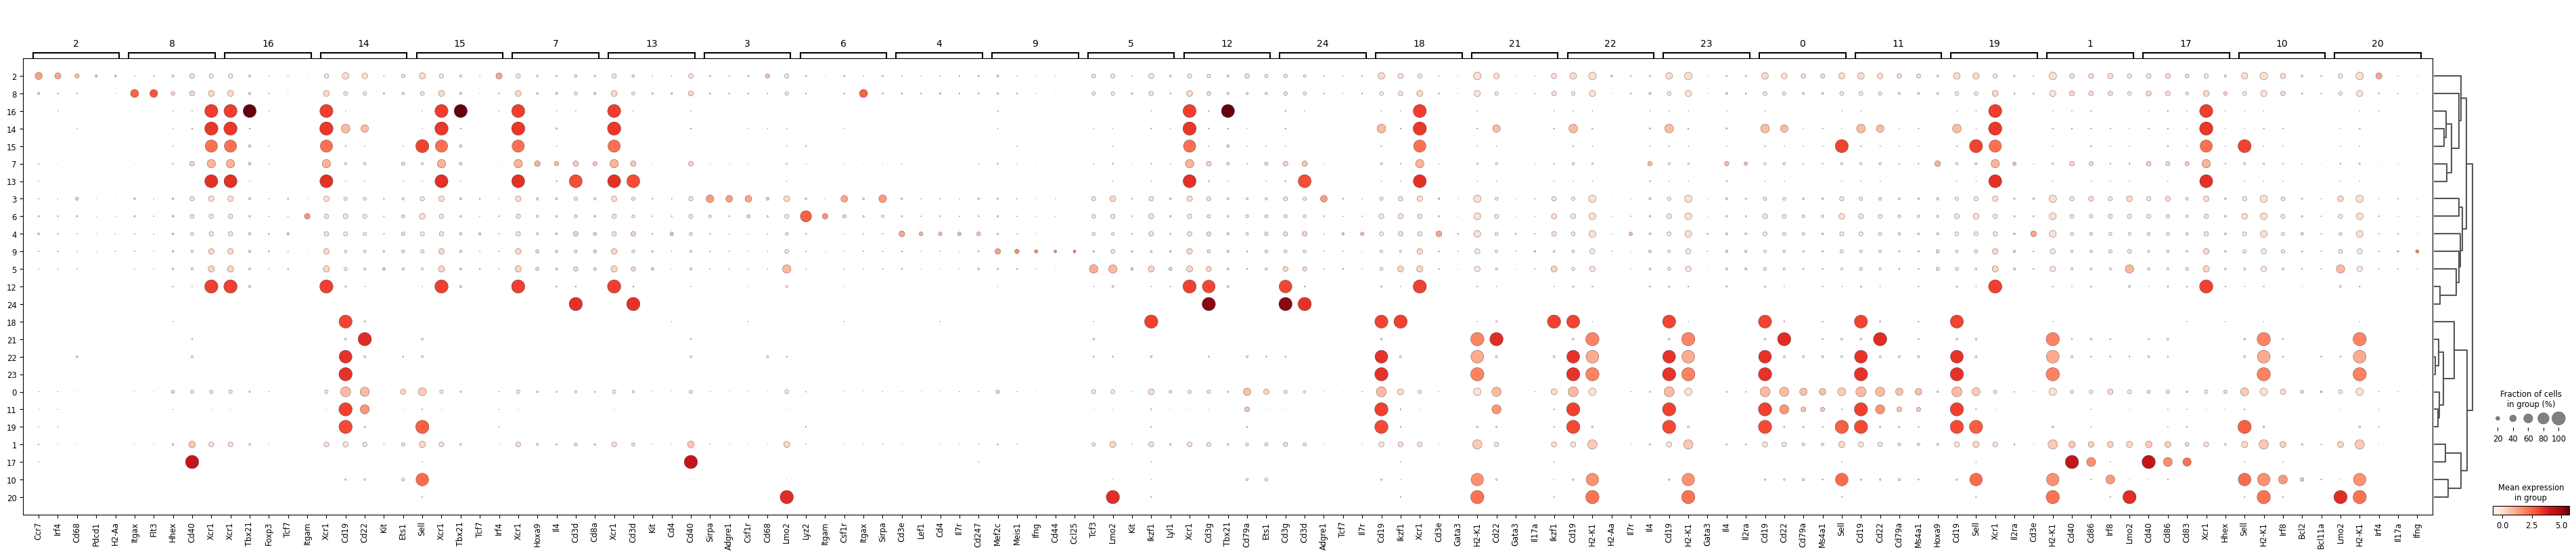

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


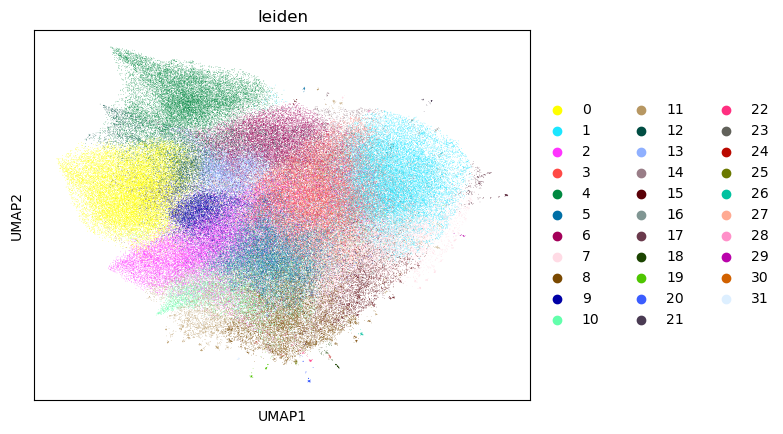

/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/unix/jiahao/anaconda3/envs/starfinder/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid 

ValueError: Incompatible observations. Dendrogram data has 25 categories but current groupby observation ['leiden'] contains 32 categories. Most likely the underlying groupby observation changed after the initial computation of `sc.tl.dendrogram`. Please run `sc.tl.dendrogram` again.'

In [6]:
base_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2024-01-08-Jiakun-MouseSpleen64Gene/'
# base_path = 'Z:/Data/Analyzed/2024-01-08-Jiakun-MouseSpleen64Gene/'
output_path = os.path.join(base_path, 'output')
expr_path = os.path.join(base_path, 'expr')
test_path = os.path.join(output_path, parameter_dict['test_id'])
if not os.path.exists(test_path):
    os.mkdir(test_path)
    
cdata = sc.read_h5ad(os.path.join(expr_path, f'combined-filtered-strict-subsample.h5ad'))

# pp 
sc.pp.normalize_total(cdata)
sc.pp.log1p(cdata)
cdata.raw = cdata
sc.pp.scale(cdata)
cdata.layers['scaled'] = cdata.X.copy()

if parameter_dict['do_regress_out']:
    sc.pp.regress_out(cdata, ['total_counts'])
    cdata.layers['corrected'] = cdata.X.copy()

if parameter_dict['do_combat']:   
    sc.pp.combat(cdata, 'sample')
    cdata.layers['combat'] = cdata.X.copy()

# pca
sc.tl.pca(cdata, svd_solver='full')

# knn
for i, j in tqdm(enumerate(parameter_dict['n_neighbors'])):
    n_neighbors = parameter_dict['n_neighbors'][i]
    n_pcs = parameter_dict['n_pcs'][i]
    sc.pp.neighbors(cdata, n_neighbors=n_neighbors, n_pcs=n_pcs)

    # umap
    sc.tl.umap(cdata)
    
    prefix = f"umap_{n_pcs}_{n_neighbors}"
    current_figure_path = os.path.join(test_path, prefix)
    if not os.path.exists(current_figure_path):
        os.mkdir(current_figure_path)
    sc.settings.figdir = current_figure_path
    
    fig, ax = plt.subplots()
    sc.pl.umap(cdata, color='total_counts', save=f'_total_counts.png')
    sc.pl.umap(cdata, color='n_genes', save=f'_n_genes.png')
    sc.pl.umap(cdata, color='sample', save=f'_sample.png')
    
    for a, b in tqdm(enumerate(parameter_dict['cluster_resolution'])):
        
        resolution = parameter_dict['cluster_resolution'][a]
        # leiden
        sc.tl.leiden(cdata, resolution=resolution)
        sc.pl.umap(cdata, color='leiden', save=f'_leiden_{resolution}.png')
        
        sc.tl.rank_genes_groups(cdata, 'leiden', method='t-test')
        sc.pl.rank_genes_groups_dotplot(cdata, n_genes=5, save=f"'_markers_{resolution}.png")